#### Ensemble Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("temps.csv")

In [4]:
df['week'].value_counts()

Tues     52
Fri      50
Sat      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: week, dtype: int64

In [5]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [6]:
df.shape

(348, 9)

In [7]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [8]:
features = pd.get_dummies(df)

In [9]:
features.iloc[:,5:].head(5)

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [10]:
labels = np.array(features['actual'])

In [11]:
features = features.drop('actual',axis=1)

In [12]:
feature_list = list(features.columns)

In [13]:
feature_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_features , test_features , train_labels , test_labels = train_test_split(features,labels, test_size= 0.2 , random_state= 0)

In [16]:
train_features.shape

(278, 14)

In [17]:
train_labels.shape

(278,)

In [18]:
test_features.shape

(70, 14)

In [19]:
test_labels.shape

(70,)

In [20]:
from sklearn.ensemble import RandomForestRegressor


In [21]:
rf = RandomForestRegressor(n_estimators=1000)

In [22]:
rf.fit(train_features,train_labels)

RandomForestRegressor(n_estimators=1000)

In [23]:
rf.score(test_features,test_labels)

0.8008167136585476

In [24]:
rf.score(train_features,train_labels)

0.9770263955567449

#### Random Forest Classifier

In [25]:
df = pd.read_csv('titanic.csv')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

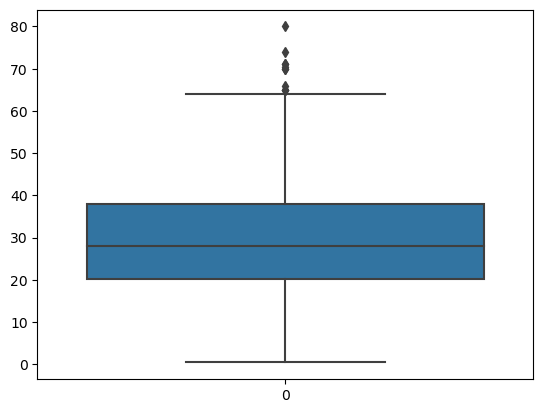

In [29]:
sns.boxplot(df['Age'])
plt.show()

In [30]:
df = df[df.Age<=65]

In [31]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
0.92      1
20.50     1
14.50     1
55.50     1
34.50     1
Name: Age, Length: 82, dtype: int64

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          524
Embarked         2
dtype: int64

In [33]:
df.drop(['Cabin'],axis=1,inplace=True)

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [35]:
df.fillna(df['Embarked'].mode().iloc[0],inplace=True)

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
from sklearn import preprocessing

In [40]:
le = preprocessing.LabelEncoder()

In [42]:
df['Sex'] = le.fit_transform(df['Sex'])

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [44]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [46]:
df.drop(['Name'],axis=1,inplace=True)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


In [48]:
df.drop(['Ticket'],axis=1,inplace=True)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [51]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [53]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']]
y = df[['Survived']]

In [54]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [55]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [56]:

from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
x = scaler.fit_transform(x)

In [59]:
x

array([[ 0.90629943,  0.76584388, -0.52023048, ..., -0.50790169,
        -0.51809364,  0.51630216],
       [-1.48565346, -1.30574915,  0.63187767, ..., -0.50790169,
         0.68724217, -2.05973549],
       [ 0.90629943, -1.30574915, -0.23220344, ..., -0.50790169,
        -0.50538773,  0.51630216],
       ...,
       [-1.48565346, -1.30574915, -0.73625076, ..., -0.50790169,
        -0.08985725,  0.51630216],
       [-1.48565346,  0.76584388, -0.23220344, ..., -0.50790169,
        -0.08985725, -2.05973549],
       [ 0.90629943,  0.76584388,  0.19983712, ..., -0.50790169,
        -0.50868186, -0.77171666]])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rcf = RandomForestClassifier(n_estimators= 500 ,random_state=1)

In [67]:
rcf.fit(xtrain,ytrain)

C:\Users\sengu\AppData\Local\Temp\ipykernel_17252\3486092562.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rcf.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=500, random_state=1)

In [68]:
rcf.score(xtest,ytest)

0.7535211267605634